Choose a Stakeholder!

What drives price!

Ideas for the project
- Predict models suited for family homes designated for kids (family size!)
    ~ price, bedrooms, bathrooms, sqft_lot(includes yard space), sqft_living, waterfront / view(depends of age of kids),
    condition, etc.
    
- Making money $$$
    ~ Cheap houses compared to value (resale)
    ~ Flipping Houses 

- Model for predicting/ suiting houses for particular age groups

- Analyze crime rates

Summarize
create a prediction website that will help people find affordable housting in this area
use living space, 
find people the opportunity to find fixers upper to increase their investment, and find relatable houses for family desires/ needs.


## Imported Libraries

In [1]:
import pandas as pd
import scipy 
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels as sm
from statsmodels.formula.api import ols
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.dummy import DummyRegressor

## Loading in Data

In [2]:
df = pd.read_csv('../data/kc_house_data.csv')

## Looking at the layout and basic information

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


initial observations:
- grade - contains an number followed by string. 
- waterfront contains NaN
- view contains NONE
- sqft_basement contains 0 so assuming no basement for 0s
- yr_renovated contains both 0 and NaN

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

null values: waterfront, view, yr_renovated
    
grade is an object.

In [5]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


- bedrooms has max of 33 (possible outlier/ input error)
- yr_renovated 75% still contains 0 values 

## Looking into mapping applications

In [6]:
df['zipcode'].value_counts() #concentrations in zipcode

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

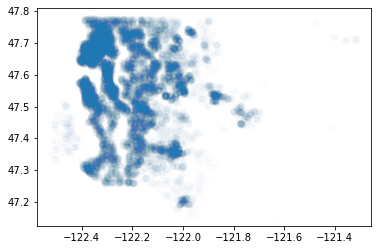

In [7]:
fig, ax=plt.subplots()
ax.scatter(df['long'], df['lat'], alpha=.01);

## Looking into correlations that drive price

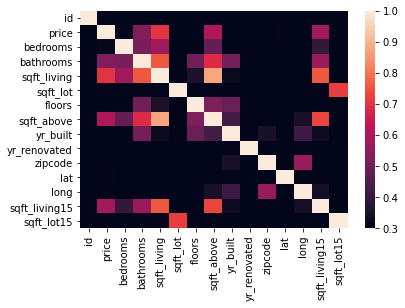

In [8]:
sns.heatmap(df.corr().abs(),vmin=.30, vmax=1); 
#adjected min and max to increase ability to distinguish middle and higher correlations in df

Bathrooms, sqft_living, sqft_above, and sqft_livign15 contain correlation with price with sqft_living being the highest.

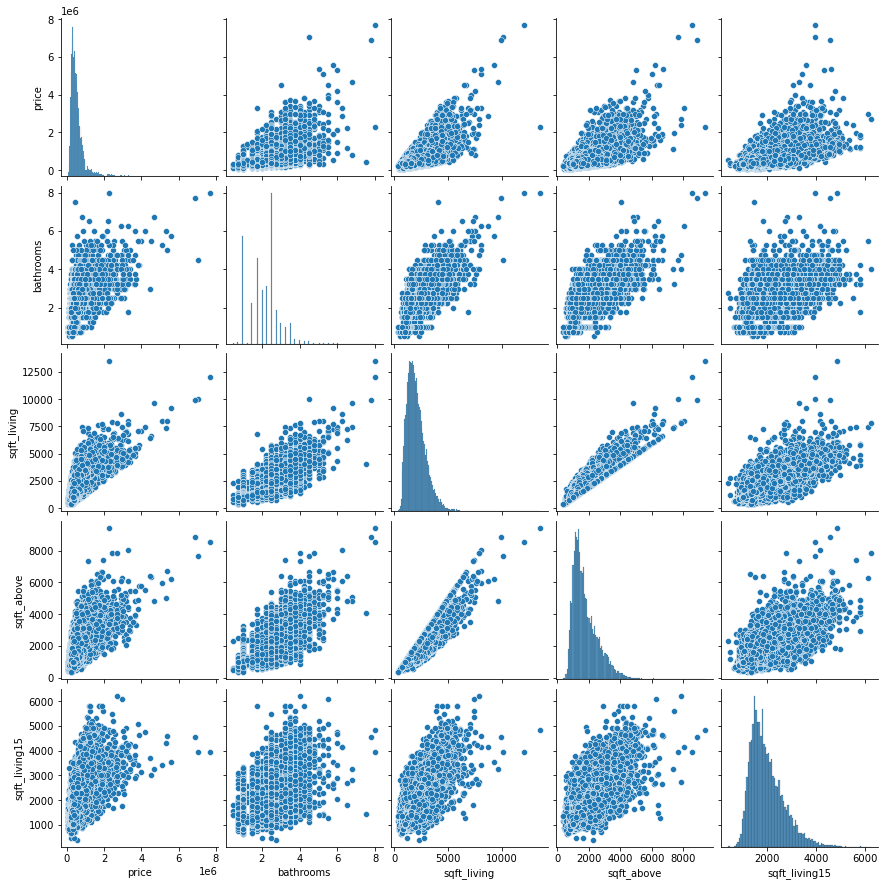

In [9]:
first_price_correlation = df[['price', 'bathrooms', 'sqft_living', 'sqft_above', 'sqft_living15']]
sns.pairplot(first_price_correlation); #checking for linearity

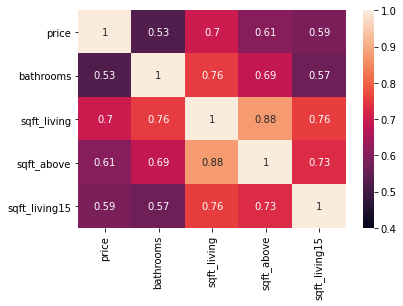

In [10]:
sns.heatmap(first_price_correlation.corr().abs(),vmin=.40, vmax=1, annot=True);

sqft_living and sqft have a very high correlation may have collinearity.
sqft_living has the highest correlation with price

In [11]:
formula = 'price ~ sqft_living'           #simple linear regression model of sqft_living with price as the target
first_mod = ols(formula, df).fit()
first_mod_summary = first_mod.summary()
first_mod_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Wed, 30 Mar 2022   Prob (F-statistic):               0.00
Time:                        00:59:55   Log-Likelihood:            -3.0006e+05
No. Observations:               21597   AIC:                         6.001e+05
Df Residuals:                   21595   BIC:                         6.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.399e+04   4410.023     -9.975      0.000   -5.26e+04   -3.53e+04
sqft_living   280.8630      1.939    144.819      0.000     277.062     284.664
==============================================================================
Omnibus:                    14801.942   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           542662.604
Skew:                           2.820   Prob(JB):                         0.00
Kurtosis:                      26.901   Cond. No.                     5.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Using yr_renovated to create a renovated column

In [12]:
df['yr_renovated'].unique() # quick look at all the values

array([   0., 1991.,   nan, 2002., 2010., 1992., 2013., 1994., 1978.,
       2005., 2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990.,
       1988., 1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989.,
       2004., 1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971.,
       1979., 1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008.,
       1968., 2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955.,
       1982., 1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957.,
       1959., 1960., 1967., 1965., 1934., 1972., 1944., 1958.])

In [13]:
df['renovated'] = df['yr_renovated'] #created a new column for boolean values for if it has been renovated or not
df.loc[df['renovated'] > 0, 'renovated'] = 1 #converted all houses that have been renovated to have a value of 1
df['renovated'].fillna(0, inplace=True) # assuming that nulls values have a value of 0
# all values in this column should be a 0 or 1 now as representing no and yes for has the house been renovated

In [14]:
f"sum of renovated houses= {sum(df['renovated']==True)} , total number of houses = {df.shape[0]}"

'sum of renovated houses= 744 , total number of houses = 21597'

Only 3% of the houses in this data set have been renovated.  Will use renovated column as a possible feature later for modeling

In [15]:
formula = 'price ~ renovated'    
mod_ren = ols(formula, df).fit()
mod_ren_summary = mod_ren.summary()
mod_ren_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     302.5
Date:                Wed, 30 Mar 2022   Prob (F-statistic):           2.64e-67
Time:                        00:59:55   Log-Likelihood:            -3.0724e+05
No. Observations:               21597   AIC:                         6.145e+05
Df Residuals:                   21595   BIC:                         6.145e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.321e+05   2526.424    210.630      0.000    5.27e+05    5.37e+05
renovated   2.368e+05   1.36e+04     17.394      0.000     2.1e+05    2.63e+05
==============================================================================
Omnibus:                    18903.581   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1076744.153
Skew:                           3.969   Prob(JB):                         0.00
Kurtosis:                      36.668   Cond. No.                         5.49
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
mod_ren.params

Intercept    532140.319858
renovated    236761.572615
dtype: float64

not very correlated but could increase R2 value in multiple linear regression model later

## Looking at correlation between grade and price

In [17]:
df['grade_number'] = df['grade'].str.split() # converting grade to only contain the number.  
                                                #Split the number and word by the space
df['grade_number'] = [int(x[0]) for x in df['grade_number']] #list comprehension to only take the first element

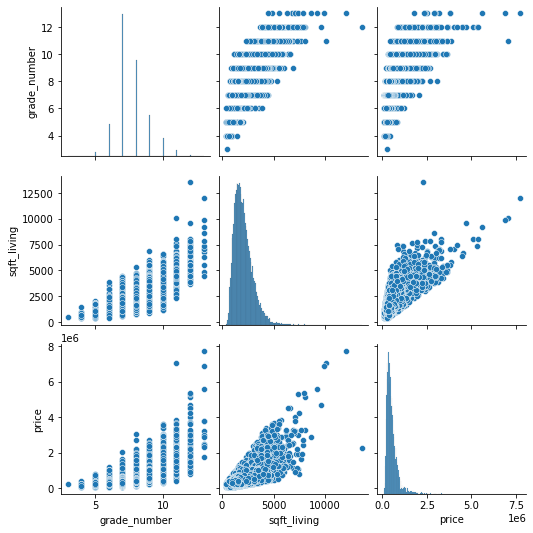

In [18]:
test_plot = df[['grade_number', 'sqft_living','price']]
sns.pairplot(test_plot);

In [19]:
test_plot.corr()

,grade_number,sqft_living,price
grade_number,1.000000,0.762779,0.667951
sqft_living,0.762779,1.000000,0.701917
price,0.667951,0.701917,1.000000


In [20]:
# need to run OHE with grade_number before because it is considered a categorical data
formula = 'price ~ grade_number'
sqft_grade_mod = ols(formula, df).fit()
sqft_grade_mod_summary = sqft_grade_mod.summary()
sqft_grade_mod_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.446
Model:                            OLS   Adj. R-squared:                  0.446
Method:                 Least Squares   F-statistic:                 1.740e+04
Date:                Wed, 30 Mar 2022   Prob (F-statistic):               0.00
Time:                        00:59:57   Log-Likelihood:            -3.0101e+05
No. Observations:               21597   AIC:                         6.020e+05
Df Residuals:                   21595   BIC:                         6.020e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -1.061e+06   1.23e+04    -86.396      0.000   -1.09e+06   -1.04e+06
grade_number  2.092e+05   1585.790    131.895      0.000    2.06e+05    2.12e+05
==============================================================================
Omnibus:                    19879.964   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2043898.709
Skew:                           4.081   Prob(JB):                         0.00
Kurtosis:                      49.954   Cond. No.                         52.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Good R2 value. Will use later in muliple linear regression model

## Looking into Duplicated Id Values

In [21]:
df['id'].value_counts()  #Noticed that there are duplications in houses id

795000620     3
1825069031    2
2019200220    2
7129304540    2
1781500435    2
             ..
7812801125    1
4364700875    1
3021059276    1
880000205     1
1777500160    1
Name: id, Length: 21420, dtype: int64

In [22]:
duplicate = df['id'].value_counts() > 1
sum(duplicate) 
# values not the same as the duplicated() method below because there is one id that is dupliucatedd 3 times so the sum is 
# off by 1

176

In [23]:
f'sum of duplicates = {sum(df.id.duplicated())}, sum of non duplicates = {(~df.id.duplicated()).sum()}, df shape= {df.shape}'
# looking to see that sum of duplicates and uniques equal the shape of the total df

'sum of duplicates = 177, sum of non duplicates = 21420, df shape= (21597, 23)'

In [24]:
duplicated_df = df.loc[df.id.duplicated(keep=False), :] #keeping all duplicated id

In [26]:
df['resold'] = df.id.duplicated()  
# created a new column denoting when a house was resold saved in original df
# further exploration was done in this subset of data
sum(df.resold)

177

In [27]:
duplicated_df.loc[duplicated_df['id'] == 795000620] #checking out the single id that was duplicated 3 times

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renovated,grade_number
17588,795000620,9/24/2014,115000.0,3,1.0,1080,6250,1.0,NO,NONE,...,0.0,1950,0.0,98168,47.5045,-122.33,1070,6250,0.0,5
17589,795000620,12/15/2014,124000.0,3,1.0,1080,6250,1.0,NO,NONE,...,0.0,1950,0.0,98168,47.5045,-122.33,1070,6250,0.0,5
17590,795000620,3/11/2015,157000.0,3,1.0,1080,6250,1.0,NaN,NONE,...,0.0,1950,NaN,98168,47.5045,-122.33,1070,6250,0.0,5


In [28]:
last_duplicated_df = df.loc[df.id.duplicated(keep='first'), :] #House info before resale
first_duplicated_df = df.loc[df.id.duplicated(keep='last'), :] #house after resale

In [30]:
first_duplicated_df 
# checking dates to be first occurrance compared to last_duplicated_df
# values should be False

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renovated,grade_number,resold
93,6021501535,7/25/2014,430000.0,3,1.50,1580,5000,1.0,NO,NONE,...,1939,0.0,98117,47.6870,-122.386,1570,4500,0.0,8,False
313,4139480200,6/18/2014,1380000.0,4,3.25,4290,12103,1.0,NO,GOOD,...,1997,0.0,98006,47.5503,-122.102,3860,11244,0.0,11,False
324,7520000520,9/5/2014,232000.0,2,1.00,1240,12092,1.0,NaN,NONE,...,1922,1984.0,98146,47.4957,-122.352,1820,7460,1.0,6,False
345,3969300030,7/23/2014,165000.0,4,1.00,1000,7134,1.0,NO,NONE,...,1943,0.0,98178,47.4897,-122.240,1020,7138,0.0,6,False
371,2231500030,10/1/2014,315000.0,4,2.25,2180,10754,1.0,NaN,NONE,...,1954,0.0,98133,47.7711,-122.341,1810,6929,0.0,7,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20164,7853400250,6/4/2014,610000.0,4,3.50,2910,5260,2.0,NO,NONE,...,2012,0.0,98065,47.5168,-121.883,2910,5260,0.0,9,False
20596,2724049222,8/2/2014,163800.0,2,2.50,1000,1092,2.0,NaN,NONE,...,2004,0.0,98118,47.5419,-122.271,1330,1466,0.0,7,False
20653,8564860270,7/8/2014,449990.0,4,2.50,2680,5539,2.0,NO,NONE,...,2013,0.0,98045,47.4759,-121.734,2680,5992,0.0,8,False
20763,6300000226,6/26/2014,240000.0,4,1.00,1200,2171,1.5,NO,NONE,...,1933,0.0,98133,47.7076,-122.342,1130,1598,0.0,7,False


In [32]:
last_duplicated_df
# checking dates to be first occurrance compared to first_duplicated_df
# values should be True

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renovated,grade_number,resold
94,6021501535,12/23/2014,700000.0,3,1.50,1580,5000,1.0,NO,NONE,...,1939,0.0,98117,47.6870,-122.386,1570,4500,0.0,8,True
314,4139480200,12/9/2014,1400000.0,4,3.25,4290,12103,1.0,NO,GOOD,...,1997,0.0,98006,47.5503,-122.102,3860,11244,0.0,11,True
325,7520000520,3/11/2015,240500.0,2,1.00,1240,12092,1.0,NO,NONE,...,1922,1984.0,98146,47.4957,-122.352,1820,7460,1.0,6,True
346,3969300030,12/29/2014,239900.0,4,1.00,1000,7134,1.0,NO,NONE,...,1943,NaN,98178,47.4897,-122.240,1020,7138,0.0,6,True
372,2231500030,3/24/2015,530000.0,4,2.25,2180,10754,1.0,NO,NONE,...,1954,0.0,98133,47.7711,-122.341,1810,6929,0.0,7,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20165,7853400250,2/19/2015,645000.0,4,3.50,2910,5260,2.0,NO,NONE,...,2012,0.0,98065,47.5168,-121.883,2910,5260,0.0,9,True
20597,2724049222,12/1/2014,220000.0,2,2.50,1000,1092,2.0,NO,NONE,...,2004,0.0,98118,47.5419,-122.271,1330,1466,0.0,7,True
20654,8564860270,3/30/2015,502000.0,4,2.50,2680,5539,2.0,NaN,NONE,...,2013,0.0,98045,47.4759,-121.734,2680,5992,0.0,8,True
20764,6300000226,5/4/2015,380000.0,4,1.00,1200,2171,1.5,NO,NONE,...,1933,0.0,98133,47.7076,-122.342,1130,1598,0.0,7,True


In [33]:
resale_price_df = last_duplicated_df[['id','price']].reset_index().drop('index', 1)
original_price_df = first_duplicated_df[['id','price']].reset_index().drop('index', 1)
#reset index so both of these data indexs should be alligned  

In [46]:
duplicated_df_resale = first_duplicated_df.reset_index() 
#used first_duplicated_df as a base to make a new df with an additional column
duplicated_df_resale.drop('resold', axis=1, inplace=True)
#due to how i set up the dataframe it was incorrectly showing resold so I dropped here. 
#made the orinal house as the base not resale.
duplicated_df_resale['resale_price'] = resale_price_df.price
duplicated_df_resale['resale_money_gained'] = duplicated_df_resale.resale_price - duplicated_df_resale.price
# made two new columns resale_price and resale_money_gained

In [47]:
duplicated_df_resale.loc[duplicated_df_resale['id'] == 795000620] #looking at the triple repeated house

,index,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renovated,grade_number,resale_price,resale_money_gained
158,17588,795000620,9/24/2014,115000.0,3,1.0,1080,6250,1.0,NO,...,0.0,98168,47.5045,-122.33,1070,6250,0.0,5,124000.0,9000.0
159,17589,795000620,12/15/2014,124000.0,3,1.0,1080,6250,1.0,NO,...,0.0,98168,47.5045,-122.33,1070,6250,0.0,5,157000.0,33000.0


In [49]:
sum(duplicated_df_resale.renovated)

4.0

In [50]:
# calculating avaerage resale price of renovated homes
duplicated_df_resale_1 = duplicated_df_resale[duplicated_df_resale.renovated == 1]
average_resale_price_ren = sum(duplicated_df_resale_1.resale_money_gained)/ len(duplicated_df_resale_1.resale_money_gained)
# calculating avaerage resale price of unrenovated homes
duplicated_df_resale_0 = duplicated_df_resale[duplicated_df_resale.renovated == 0]
average_resale_price_unren = sum(duplicated_df_resale_0.resale_money_gained)/ len(duplicated_df_resale_0.resale_money_gained)
#checking values
average_resale_price_ren, average_resale_price_unren

(90900.0, 136834.10982658959)

There were only 4 renovated houses that were resold so limited data for this anylysis

In [52]:
if average_resale_price_ren > average_resale_price_unren:
    print('Renovated homes on average are being resold at a higher rate than unrenovated')
else:
    print('Unrenovated homes on average are being resold at a higher rate than renovated')

Unrenovated homes on average are being resold at a higher rate than renovated


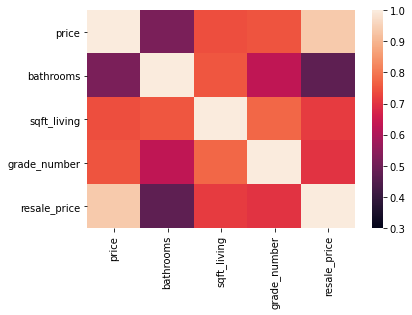

In [59]:
test_duplicate_corr = duplicated_df_resale.drop(['sqft_living15','bedrooms','sqft_above','index', 'id','yr_renovated','yr_built', 'sqft_lot','lat','long','sqft_lot15','zipcode','resale_money_gained','renovated','floors'], axis=1)
sns.heatmap(test_duplicate_corr.corr().abs(),vmin=.30, vmax=1);

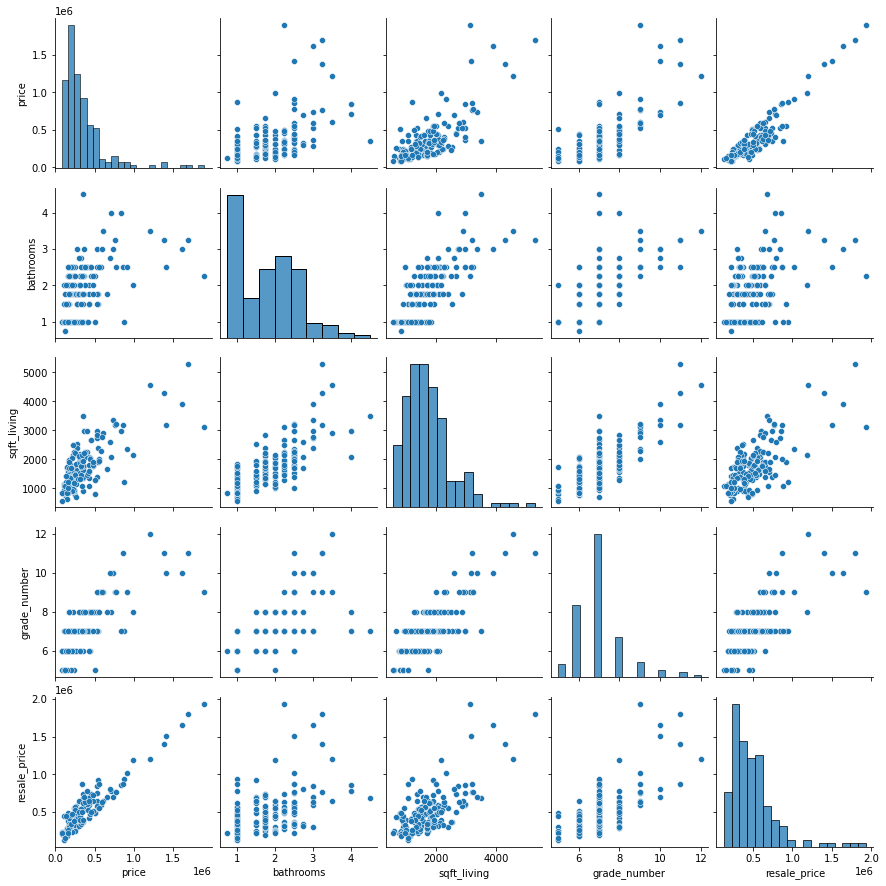

In [60]:
sns.pairplot(test_duplicate_corr);

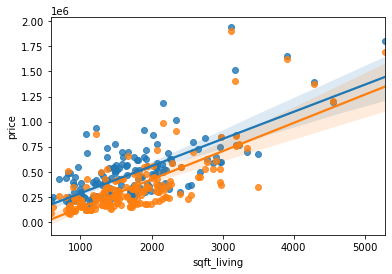

In [61]:
sns.regplot(x=duplicated_df_resale.sqft_living,y=duplicated_df_resale.resale_price);
sns.regplot(x=duplicated_df_resale.sqft_living,y=duplicated_df_resale.price);

In [62]:
# Houses that were bought and relisted are being sold on average at higher rates

In [64]:
formula = 'price ~ resold'
sqft_resale_mod = ols(formula, df).fit()
sqft_resale_mod_summary = sqft_resale_mod.summary()
sqft_resale_mod_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     3.796
Date:                Wed, 30 Mar 2022   Prob (F-statistic):             0.0514
Time:                        01:22:31   Log-Likelihood:            -3.0739e+05
No. Observations:               21597   AIC:                         6.148e+05
Df Residuals:                   21595   BIC:                         6.148e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.407e+05   2509.942    215.439      0.000    5.36e+05    5.46e+05
resold[T.True] -5.402e+04   2.77e+04     -1.948      0.051   -1.08e+05     322.704
==============================================================================
Omnibus:                    19102.135   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1131277.423
Skew:                           4.023   Prob(JB):                         0.00
Kurtosis:                      37.531   Cond. No.                         11.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Model of house price and city model

In [65]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renovated,grade_number,resold
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,1955,0.0,98178,47.5112,-122.257,1340,5650,0.0,7,False
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,1951,1991.0,98125,47.7210,-122.319,1690,7639,1.0,7,False
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,1933,NaN,98028,47.7379,-122.233,2720,8062,0.0,6,False
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,1965,0.0,98136,47.5208,-122.393,1360,5000,0.0,7,False
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,1987,0.0,98074,47.6168,-122.045,1800,7503,0.0,8,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,2009,0.0,98103,47.6993,-122.346,1530,1509,0.0,8,False
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,2014,0.0,98146,47.5107,-122.362,1830,7200,0.0,8,False
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,2009,0.0,98144,47.5944,-122.299,1020,2007,0.0,7,False
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,2004,0.0,98027,47.5345,-122.069,1410,1287,0.0,8,False


In [66]:
df_hanis = pd.read_csv('https://raw.githubusercontent.com/hanis-z/Phase-2-project/Hanis/individualNotebooks/housing_gdf_complete.csv')
df_hanis

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,lat,long,sqft_living15,sqft_lot15,coord,geometry,city,dist_seattle,neighborhood,in_seattle
0,0,8856004730,9/17/2014,199950.0,2,2.75,1590,20917,1.5,NO,...,47.2786,-122.250,1310,6000,"(-122.25, 47.2786)",POINT (392815.9311460542 31962.040946318088),Algona,38586.298196,NaN,False
1,1,3356406510,5/30/2014,196440.0,3,2.00,1560,7352,1.0,NO,...,47.2804,-122.251,1120,7950,"(-122.251, 47.2804)",POINT (392743.96777042677 32163.527499454583),Algona,38375.160433,NaN,False
2,2,3356404330,11/19/2014,206000.0,4,2.00,1720,7560,1.0,NO,...,47.2845,-122.250,1750,7988,"(-122.25, 47.2845)",POINT (392828.008518306 32617.90153434322),Algona,37943.562770,NaN,False
3,3,128500260,5/8/2014,262000.0,4,2.50,2020,6236,2.0,NO,...,47.2796,-122.247,1940,5076,"(-122.247, 47.2796)",POINT (393044.9257391654 32069.02917550225),Algona,38523.082722,NaN,False
4,4,8856004400,9/2/2014,235000.0,4,1.00,1610,24000,1.5,NO,...,47.2751,-122.252,1270,9600,"(-122.252, 47.2751)",POINT (392657.45531036914 31575.759156857133),Algona,38938.369932,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,21591,9808700370,6/23/2014,899000.0,3,1.00,1480,6978,2.0,NO,...,47.6497,-122.217,2660,13062,"(-122.217, 47.6497)",POINT (396054.35030430346 73169.14819915775),Yarrow Point,10695.015963,NaN,False
21592,21592,9809000010,1/6/2015,1630000.0,5,2.50,3090,16583,2.0,NO,...,47.6458,-122.218,3740,17853,"(-122.218, 47.6458)",POINT (395971.43242679926 72736.96475485197),Yarrow Point,10491.736637,NaN,False
21593,21593,9808700025,2/11/2015,1500000.0,3,1.50,1910,21374,1.0,NO,...,47.6453,-122.214,2850,16167,"(-122.214, 47.6453)",POINT (396270.91838183696 72675.98317698675),Yarrow Point,10764.715056,NaN,False
21594,21594,1925059254,5/7/2015,3000000.0,5,4.00,6670,16481,2.0,NO,...,47.6409,-122.221,4800,16607,"(-122.221, 47.6409)",POINT (395736.24545047607 72196.32795617428),Yarrow Point,10130.240401,NaN,False


In [ ]:
#df = df.merge(df_hanis[['in_seattle', 'id']],how='inner', on='id')
#sum(df['in_seattle'] == 1) ,  sum(df_hanis['in_seattle'] == 1)

In [67]:
test_df = df_hanis[['price','in_seattle']]
test_df.corr()

,price,in_seattle
price,1.000000,0.094224
in_seattle,0.094224,1.000000


In [68]:
formula = 'price ~ in_seattle'
sqft_grade_mod = ols(formula, df_hanis).fit()
sqft_grade_mod_summary = sqft_grade_mod.summary()
sqft_grade_mod_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     193.4
Date:                Wed, 30 Mar 2022   Prob (F-statistic):           8.76e-44
Time:                        01:24:14   Log-Likelihood:            -3.0728e+05
No. Observations:               21596   AIC:                         6.146e+05
Df Residuals:                   21594   BIC:                         6.146e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            5.17e+05   3001.117    172.265      0.000    5.11e+05    5.23e+05
in_seattle[T.True]  7.469e+04   5370.452     13.908      0.000    6.42e+04    8.52e+04
==============================================================================
Omnibus:                    19323.482   Durbin-Watson:                   1.370
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1181275.426
Skew:                           4.089   Prob(JB):                         0.00
Kurtosis:                      38.297   Cond. No.                         2.42
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [69]:
sqft_grade_mod.params

Intercept             516988.422435
in_seattle[T.True]     74692.048799
dtype: float64

clean data
    traintestsplit
dummyregressor
    modelvalidation
first model
    modelvalidation
...
nth model
    modelvalidation

## looking into View

In [70]:
df.view.unique() 
#viewing categories for view
#need to deal with nan

array(['NONE', nan, 'GOOD', 'EXCELLENT', 'AVERAGE', 'FAIR'], dtype=object)

In [71]:
df.view.value_counts()

NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

In [87]:
df.view.isna().value_counts() 
#very small null size replace with NONE

False    21597
Name: view, dtype: int64

In [88]:
df['view'].fillna('NONE', inplace = True) #filled na with NONE

In [90]:
df.view.value_counts() #sanity check

NONE         19485
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

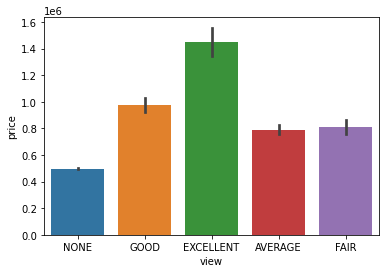

In [91]:
sns.barplot(x='view',y='price', data=df); #visualization of average view price per category

In [92]:
ohe = OneHotEncoder(drop=None) # instantiate OHE, kept all groups, will drop in model

In [93]:
view_dummy = ohe.fit_transform(df[['view']]) #fit and transform

In [94]:
list(ohe.categories_[0]) # looking at the order of the categories

['AVERAGE', 'EXCELLENT', 'FAIR', 'GOOD', 'NONE']

In [95]:
view_dummy.todense() #examine

matrix([[0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 1.],
        ...,
        [0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 1.]])

In [96]:
view_df = pd.DataFrame(view_dummy.todense(), columns=['AVERAGE','EXCELLENT', 'FAIR', 'GOOD', 'NONE'])
view_df

,AVERAGE,EXCELLENT,FAIR,GOOD,NONE
0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...
21592,0.0,0.0,0.0,0.0,1.0
21593,0.0,0.0,0.0,0.0,1.0
21594,0.0,0.0,0.0,0.0,1.0
21595,0.0,0.0,0.0,0.0,1.0


In [99]:
dum_df = df.merge(view_df, left_index=True, right_index=True).drop(columns=['view']) # merging new columns from OHE to dum_df
dum_df.columns #looking at all of the columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'renovated', 'grade_number', 'resold',
       'AVERAGE', 'EXCELLENT', 'FAIR', 'GOOD', 'NONE'],
      dtype='object')

In [100]:
test_dum_df = dum_df[['price','bedrooms','bathrooms','condition','grade_number','renovated','resold', 'EXCELLENT', 'FAIR', 'GOOD', 'NONE']]
test_dum_df.corr()

,price,bedrooms,bathrooms,grade_number,renovated,resold,EXCELLENT,FAIR,GOOD,NONE
price,1.000000,0.308787,0.525906,0.667951,0.117543,-0.013258,0.303059,0.092597,0.182932,-0.356243
bedrooms,0.308787,1.000000,0.514508,0.356563,0.017635,-0.008902,0.033127,0.021943,0.049942,-0.079232
bathrooms,0.525906,0.514508,1.000000,0.665838,0.046742,-0.037235,0.105789,0.037935,0.111907,-0.175884
grade_number,0.667951,0.356563,0.665838,1.000000,0.015259,-0.045725,0.146188,0.048549,0.141873,-0.235252
renovated,0.117543,0.017635,0.046742,0.015259,1.000000,-0.005907,0.067723,0.028214,0.052768,-0.081407
resold,-0.013258,-0.008902,-0.037235,-0.045725,-0.005907,1.000000,0.001717,-0.007137,-0.003942,0.016096
EXCELLENT,0.303059,0.033127,0.105789,0.146188,0.067723,0.001717,1.000000,-0.015204,-0.018943,-0.370721
FAIR,0.092597,0.021943,0.037935,0.048549,0.028214,-0.007137,-0.015204,1.000000,-0.019333,-0.378362
GOOD,0.182932,0.049942,0.111907,0.141873,0.052768,-0.003942,-0.018943,-0.019333,1.000000,-0.471419
NONE,-0.356243,-0.079232,-0.175884,-0.235252,-0.081407,0.016096,-0.370721,-0.378362,-0.471419,1.000000


<AxesSubplot:>

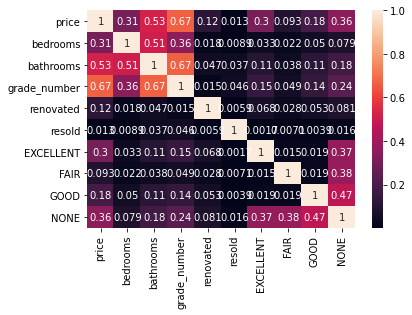

In [101]:
sns.heatmap(test_dum_df.corr().abs(),annot=True)

In [102]:
formula = 'price ~ EXCELLENT + FAIR + GOOD + AVERAGE'
sqft_grade_mod = ols(formula, dum_df).fit()
sqft_grade_mod_summary = sqft_grade_mod.summary()
sqft_grade_mod_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.165
Model:                            OLS   Adj. R-squared:                  0.165
Method:                 Least Squares   F-statistic:                     1065.
Date:                Wed, 30 Mar 2022   Prob (F-statistic):               0.00
Time:                        01:34:11   Log-Likelihood:            -3.0545e+05
No. Observations:               21597   AIC:                         6.109e+05
Df Residuals:                   21592   BIC:                         6.109e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.972e+05   2405.499    206.698      0.000    4.92e+05    5.02e+05
EXCELLENT   9.553e+05    1.9e+04     50.245      0.000    9.18e+05    9.93e+05
FAIR        3.162e+05   1.86e+04     16.962      0.000     2.8e+05    3.53e+05
GOOD        4.761e+05   1.51e+04     31.547      0.000    4.46e+05    5.06e+05
AVERAGE     2.942e+05   1.11e+04     26.461      0.000    2.72e+05    3.16e+05
==============================================================================
Omnibus:                    17955.578   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1079721.400
Skew:                           3.622   Prob(JB):                         0.00
Kurtosis:                      36.873   Cond. No.                         8.37
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [103]:
sqft_grade_mod.params.index[1:5]

Index(['EXCELLENT', 'FAIR', 'GOOD', 'AVERAGE'], dtype='object')

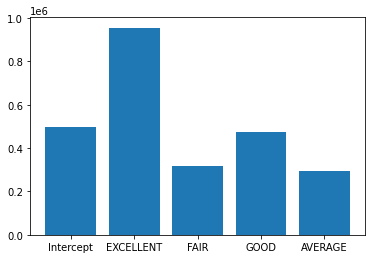

In [104]:
plt.bar(sqft_grade_mod.params.index, sqft_grade_mod.params.values);

## Ratio between bedrooms and bathrooms

In [105]:
df['bedrooms/bathrooms'] = df.bedrooms / df.bathrooms

<AxesSubplot:>

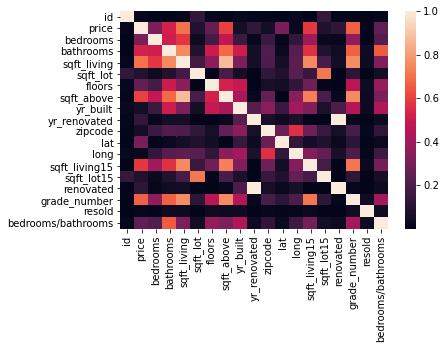

In [106]:
sns.heatmap(df.corr().abs())

In [107]:
formula = 'price ~ bedrooms/bathrooms'
sqft_grade_mod = ols(formula, df).fit()
sqft_grade_mod_summary = sqft_grade_mod.summary()
sqft_grade_mod_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.299
Model:                            OLS   Adj. R-squared:                  0.299
Method:                 Least Squares   F-statistic:                     4599.
Date:                Wed, 30 Mar 2022   Prob (F-statistic):               0.00
Time:                        01:34:26   Log-Likelihood:            -3.0356e+05
No. Observations:               21597   AIC:                         6.071e+05
Df Residuals:                   21594   BIC:                         6.071e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           4.454e+05   8869.995     50.219      0.000    4.28e+05    4.63e+05
bedrooms           -1.181e+05   3787.998    -31.177      0.000   -1.26e+05   -1.11e+05
bedrooms:bathrooms  6.573e+04    830.625     79.135      0.000    6.41e+04    6.74e+04
==============================================================================
Omnibus:                    15582.541   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           641174.314
Skew:                           3.010   Prob(JB):                         0.00
Kurtosis:                      29.005   Cond. No.                         42.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""